<a href="https://colab.research.google.com/github/sbesinski/kaggle_ML/blob/main/gym_member_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.6k/21.6k [00:00<00:00, 22.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(os.path.join(path, "gym_members_exercise_tracking.csv"))
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [6]:
df.keys()

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

df.drop(columns=["Weight (kg)", "Height (m)", "Fat_Percentage", "BMI"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Max_BPM                        973 non-null    int64  
 3   Avg_BPM                        973 non-null    int64  
 4   Resting_BPM                    973 non-null    int64  
 5   Session_Duration (hours)       973 non-null    float64
 6   Calories_Burned                973 non-null    float64
 7   Workout_Type                   973 non-null    object 
 8   Water_Intake (liters)          973 non-null    float64
 9   Workout_Frequency (days/week)  973 non-null    int64  
 10  Experience_Level               973 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 83.7+ KB


In [8]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Workout_Type"] = le.fit_transform(df["Workout_Type"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Max_BPM                        973 non-null    int64  
 3   Avg_BPM                        973 non-null    int64  
 4   Resting_BPM                    973 non-null    int64  
 5   Session_Duration (hours)       973 non-null    float64
 6   Calories_Burned                973 non-null    float64
 7   Workout_Type                   973 non-null    int64  
 8   Water_Intake (liters)          973 non-null    float64
 9   Workout_Frequency (days/week)  973 non-null    int64  
 10  Experience_Level               973 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 83.7 KB


In [9]:
df

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
0,56,1,180,157,60,1.69,1313.0,3,3.5,4,3
1,46,0,179,151,66,1.30,883.0,1,2.1,4,2
2,32,0,167,122,54,1.11,677.0,0,2.3,4,2
3,25,1,190,164,56,0.59,532.0,2,2.1,3,1
4,38,1,188,158,68,0.64,556.0,2,2.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,187,158,67,1.57,1364.0,2,3.5,4,3
969,25,1,184,166,56,1.38,1260.0,2,3.0,2,1
970,59,0,194,120,53,1.72,929.0,0,2.7,5,3
971,32,1,198,146,62,1.10,883.0,1,2.1,3,2


In [10]:
feature_columns = ['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level']

target_column = 'Workout_Type'
scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])
df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
0,1.422343,1,0.010081,0.922970,-0.303555,1.264598,1.495690,3,1.455967,0.743295,1.609784
1,0.600965,0,-0.076726,0.504494,0.515749,0.127098,-0.082284,1,-0.877898,0.743295,0.257176
2,-0.548964,0,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,0,-0.544488,0.743295,0.257176
3,-1.123928,1,0.878155,1.411193,-0.849757,-1.943735,-1.370351,2,-0.877898,-0.352502,-1.095432
4,-0.056137,1,0.704540,0.992716,0.788850,-1.797902,-1.282278,2,0.289035,-0.352502,-1.095432


In [11]:
df[target_column]

,Workout_Type
0,3
1,1
2,0
3,2
4,2
...,...
968,2
969,2
970,0
971,1


In [12]:
X = df[feature_columns]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('classifier', DecisionTreeClassifier(max_depth=20, random_state=42))
])

model = pipeline.fit(X_train, y_train)
predicted_train_set = model.predict(X_train)
predicted_test_set = model.predict(X_test)

metrics = {
    "Accuracy": accuracy_score(y_train, predicted_train_set),
    "Precision (macro)": precision_score(y_train, predicted_train_set, average='macro'),
    "Recall (macro)": recall_score(y_train, predicted_train_set, average='macro'),
    "F1 Score (macro)": f1_score(y_train, predicted_train_set, average='macro'),
    "Precision (weighted)": precision_score(y_train, predicted_train_set, average='weighted'),
    "Recall (weighted)": recall_score(y_train, predicted_train_set, average='weighted'),
    "F1 Score (weighted)": f1_score(y_train, predicted_train_set, average='weighted'),
}

# Wyświetlanie wyników
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9871
Precision (macro): 0.9879
Recall (macro): 0.9873
F1 Score (macro): 0.9875
Precision (weighted): 0.9875
Recall (weighted): 0.9871
F1 Score (weighted): 0.9872


In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=15, scoring='accuracy')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.23076923 0.16923077 0.32307692 0.26153846 0.21538462 0.21538462
 0.30769231 0.33846154 0.26153846 0.4        0.27692308 0.24615385
 0.32307692 0.265625   0.25      ]


In [15]:
# Access the model from the pipeline to extract feature importances
model = pipeline.named_steps['classifier']
feature_importances = model.feature_importances_
feature_importances

array([0.1851281 , 0.14015531, 0.16098049, 0.09000031, 0.11056184,
       0.15095883, 0.10149818, 0.04292574, 0.01779119])

Text(0.5, 1.0, 'Istotność zmiennych')

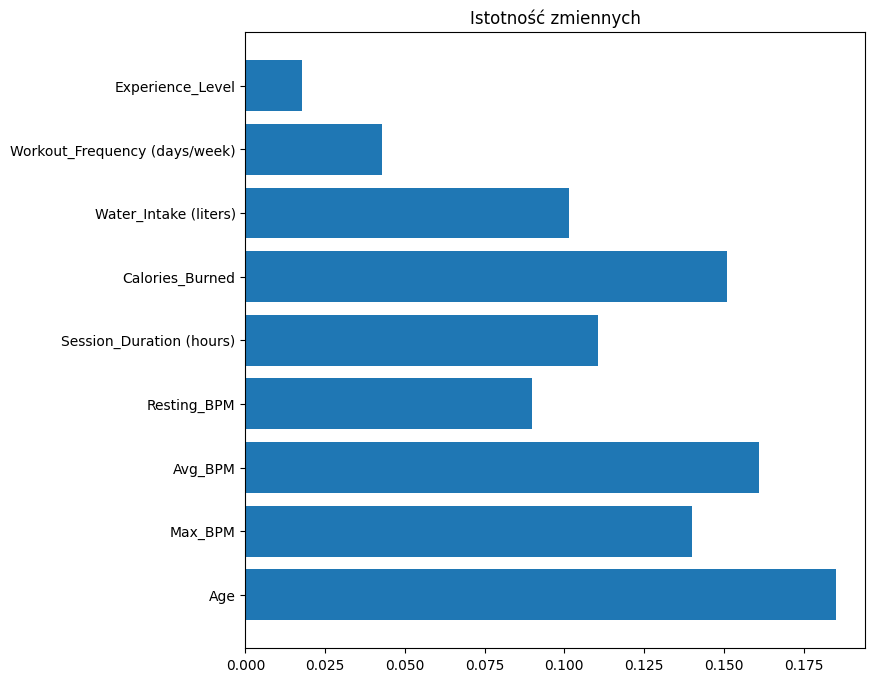

In [16]:
plt.figure(figsize=(8, 8))
plt.barh(feature_columns, feature_importances)
plt.title('Istotność zmiennych')

In [17]:
testing = {
    'Age': [12],
    'Gender': [0],
    'Max_BPM': [10],
    'Avg_BPM': [30],
    'Resting_BPM': [60],
    'Session_Duration (hours)': [1.69],
    'Calories_Burned': [180.0],
    'Water_Intake (liters)': [1.2],
    'Workout_Frequency (days/week)': [1],
    'Experience_Level': [1]  # Make sure this feature is included
}

# Convert to DataFrame
testing_df = pd.DataFrame(testing)

# Ensure the columns in testing_df match those in the training data
# The columns should be exactly the same as in `feature_columns`
testing_df = testing_df[feature_columns]

# Scaling the test data using the trained scaler (same as the training data)
testing_scaled = scaler.transform(testing_df)

# Predicting with the model
prediction_value = model.predict(testing_scaled)
print("Predicted value: ", prediction_value)

Predicted value:  [3]


In [18]:
print(f"Test Accuracy: {accuracy_score(y_test, predicted_test_set):.4f}")

Test Accuracy: 0.2974


In [19]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=10, random_state=42))
])

model = pipeline.fit(X_train, y_train)
model.score(X_test, y_test)

0.2564102564102564

In [20]:
print(testing)

{'Age': [12], 'Gender': [0], 'Max_BPM': [10], 'Avg_BPM': [30], 'Resting_BPM': [60], 'Session_Duration (hours)': [1.69], 'Calories_Burned': [180.0], 'Water_Intake (liters)': [1.2], 'Workout_Frequency (days/week)': [1], 'Experience_Level': [1]}


In [21]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

model = pipeline.fit(X_train, y_train)
model.score(X_test, y_test)

0.28717948717948716

In [22]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
df["Gender"] = oh.fit_transform(df["Gender"].values.reshape(-1, 1)).toarray()
df["Workout_Type"] = oh.fit_transform(df["Workout_Type"].values.reshape(-1, 1)).toarray()
df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
0,1.422343,0.0,0.010081,0.922970,-0.303555,1.264598,1.495690,0.0,1.455967,0.743295,1.609784
1,0.600965,1.0,-0.076726,0.504494,0.515749,0.127098,-0.082284,0.0,-0.877898,0.743295,0.257176
2,-0.548964,1.0,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.0,-0.544488,0.743295,0.257176
3,-1.123928,0.0,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.0,-0.877898,-0.352502,-1.095432
4,-0.056137,0.0,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.0,0.289035,-0.352502,-1.095432


In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=20, random_state=42))
])

model = pipeline.fit(X_train, y_train)
model.score(X_test, y_test)

0.29743589743589743

In [24]:
print(X_train.shape)  # Wynik: (liczba_próbek, liczba_cech)
print(X_test.shape)

(778, 9)
(195, 9)
